In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('/content/1_cbgEHnGOojOY3leGrGRq1Q.webp', 0)
target = cv2.imread('/content/0.webp', 0)

In [ ]:
img_hist = np.zeros(256)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img_hist[img[i, j]] += 1


matching_hist = np.zeros(256)
for i in range(target.shape[0]):
    for j in range(target.shape[1]):
        matching_hist[target[i, j]] += 1


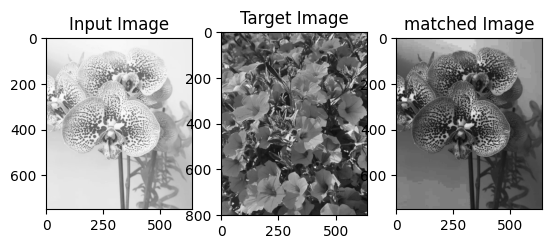

In [ ]:
input_cdf = np.zeros(256)
input_cdf[0] = img_hist[0]
for i in range(1, 256):
    input_cdf[i] = input_cdf[i-1] + img_hist[i]

nk = img.shape[0] * img.shape[1]
input_norm_cdf = input_cdf / nk
target_cdf = np.zeros(256, dtype=np.int32)
target_cdf[0] = matching_hist[0]
for i in range(1, 256):
    target_cdf[i] = target_cdf[i-1] + matching_hist[i]

nk_target = target.shape[0] * target.shape[1]
test = target_cdf / nk_target

maping = np.zeros(256, dtype=np.uint8)
for i in range(256):
    j = np.argmin(np.abs(input_norm_cdf[i] - test))
    maping[i] = j

matched_img = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        matched_img[i, j] = maping[img[i, j]]

fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Input Image')
axes[1].imshow(target, cmap='gray')
axes[1].set_title('Target Image')
axes[2].imshow(matched_img, cmap='gray')
axes[2].set_title('matched Image')
plt.show()